In [1]:
# Schwefel_12
# In the paper Ngen=5000  NPAR=100 dim=30
# JADE: Adaptive Differential Evolution with Optional External Archive

In [2]:
#  cd C:/Users/TREX/Desktop/Lockdown Paper Raiana/notebooks
# jupyter notebook Frank_Schwefel_12_jun_27_2020.ipynb

In [3]:
import Go2Ann
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=5000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100 # NUMBER OF PARTICLES
mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão

#TOTAL=ITE

############################### Função
dim=30

#fchoice='Rastrigin' #fchoice='Michalewicz' #fchoice='Schwefel'
fchoice='Schwefel_12'
Fun=Function.Schwefel_12

MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS


In [4]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

In [5]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [6]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [7]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [8]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [9]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [10]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [11]:
#TOTAL=7*dim*its*ITE
TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR



dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
for i in range(rodadas):
  SOMA=0
  pop = np.random.rand(NPAR, dimensions)
  diff=np.zeros(PAR)
  for ii in range(PAR):
    diff[ii] = MAX[ii]-MIN[ii]
  X = MIN + pop * diff
    
  PONTOS=ITE # DIVISOES DA POPULACAO

 




In [12]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for i in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    SOMAf=0
    
    start_ite = time.time()
    delta_time=(start_ite-start_time)/60
    
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)
    for ii in range(PAR):
      diff[ii] = MAX[ii]-MIN[ii]
    X = MIN + pop * diff
    Xf = MIN + pop * diff
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X])

    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X,Fitness)
    nrow,ncol=X.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1

    
    for k in range(ITE):
      X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,its,Fun,X,SOMA,TOTAL)
     

      
      MAT_IND=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]

      Fitness = np.asarray([Fun(ind) for ind in X])
      Maior=np.argmax(Fitness)
      Menor=np.argmin(Fitness)

    print('rodada=',i,'total=',RUNS,'Fobj=',FOBEST)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

ite= 0 total=50 time= 1.6669432322184246e-05
rodada= 0 total= 50 Fobj= 11905.9616031
ite= 1 total=50 time= 15.129768296082814
rodada= 1 total= 50 Fobj= 9866.72479394
ite= 2 total=50 time= 31.023374279340107
rodada= 2 total= 50 Fobj= 11734.4184056
ite= 3 total=50 time= 45.86528077920278
rodada= 3 total= 50 Fobj= 10804.7636334
ite= 4 total=50 time= 60.40036923885346
rodada= 4 total= 50 Fobj= 11476.0955361
ite= 5 total=50 time= 74.05759311119715
rodada= 5 total= 50 Fobj= 11518.0961503
ite= 6 total=50 time= 87.04499573310217
rodada= 6 total= 50 Fobj= 10924.7005324
ite= 7 total=50 time= 99.22729262510936
rodada= 7 total= 50 Fobj= 9012.39623224
ite= 8 total=50 time= 110.78136787017186
rodada= 8 total= 50 Fobj= 10661.5774292
ite= 9 total=50 time= 122.73150908549627
rodada= 9 total= 50 Fobj= 13235.8253516
ite= 10 total=50 time= 135.26944929361343
rodada= 10 total= 50 Fobj= 13024.0869415
ite= 11 total=50 time= 148.46947606404623
rodada= 11 total= 50 Fobj= 12523.972585
ite= 12 total=50 time= 161

In [13]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [14]:
pd.set_option('display.max_columns', 30)  
print(df)

      DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X     NP  \
0           318.969804     1.012752  0.000133         1.0      2.0  100.0   
1           317.177733     1.007062  0.000267         0.0      0.0  100.0   
2           318.187824     1.010269  0.000400         0.0      0.0  100.0   
3           317.960548     1.009547  0.000533         0.0      0.0  100.0   
4           318.427128     1.011029  0.000667         0.0      0.0  100.0   
5           318.062916     1.009872  0.000800         0.0      0.0  100.0   
6           317.268633     1.007351  0.000933         0.0      0.0  100.0   
7           316.124671     1.003718  0.001067         0.0      0.0  100.0   
8           315.930887     1.003103  0.001200         0.0      0.0  100.0   
9           316.255886     1.004135  0.001333         0.0      0.0  100.0   
10          315.723044     1.002443  0.001467         1.0      2.0  100.0   
11          315.496739     1.001725  0.001600         0.0      0.0  100.0   

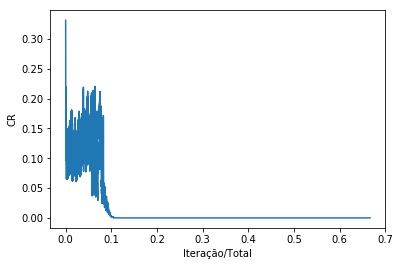

In [15]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

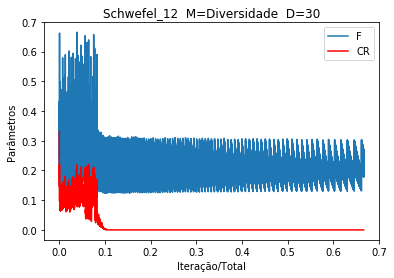

In [16]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


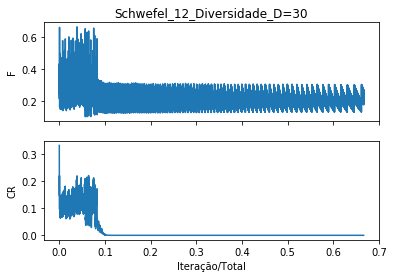

In [17]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [18]:
nome='_ANN_Div3x4_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
print('MÉDIA: ',MEAN[-1])
print('MIN __:',MINFO)
print('MAX__: ',MAXFO)
print('STD __:',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)


DE_POP_VAR_F_CR TOTAL= 750000 Iterações= 5000 Dim= 30 Min/Max= -100 / 100 _ Schwefel_12
_ANN_Div3x4_Fo-0.5_CRo-0.5_D-30_Interv-5000 

MÉDIA:  10900.1389921
MIN __: 5867.02436792
MAX__:  14562.3969191
STD __: 1793.00217738
Tempo Médio= 739.196 segundos ---
50 Rodadas

BEST:  [ -2.31267057e+01   1.33328117e+01  -7.65557863e+00   2.10260844e+01
  -3.14175238e+01   5.15010552e+01  -2.43305209e+01   1.66223751e+00
   2.99712307e+01  -3.59955237e+01  -5.19906407e+00   4.30267185e+01
  -5.49760178e+01   7.49433836e+00   8.08253753e+00   1.00100231e+01
  -1.77111018e+00  -4.84749738e+00   3.74896602e+00  -1.61279051e+01
   2.37068924e+01  -1.31112303e+01   1.99586876e+01  -2.34366204e+01
   7.74948795e+00  -3.83495896e-01   1.50239791e+00   1.75873788e+00
  -4.00020079e+00   2.19025772e-01   5.86702437e+03]
